### Курс «Python для анализа данных»
### Дипломная работа Чепурных Н.В.

1.Загрузить файл hr.csv.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [41]:
data=pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


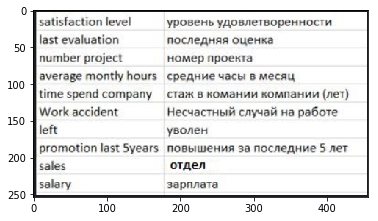

In [42]:
plt.imshow(plt.imread('index.png'))
plt.show()

In [43]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [44]:
# для дальнейшего анализа преобразуем столбец salary в числовую форму, заменим low на 1, medium - 2, high - 3
data['salary'] = data['salary'].map({'low': 1, 'medium': 2, 'high': 3}) 

In [45]:
data['salary'].unique()

array([1, 2, 3], dtype=int64)

Пропусков данных в файле нет.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [46]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [47]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


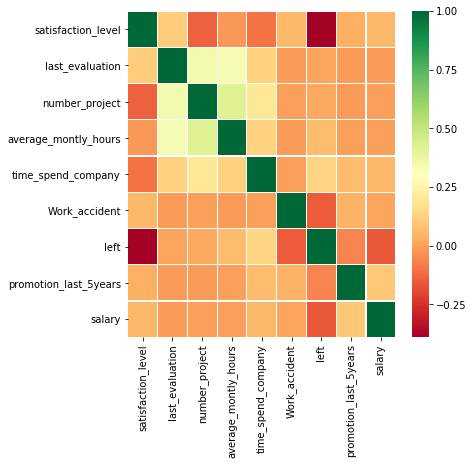

In [48]:
f, ax = plt.subplots(figsize=(6, 6))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

Корреляция между параметрами выражена слабо. Прямой линейной связи между параметрами нет.

4.Визуализировать несколько взаимосвязей между переменными.

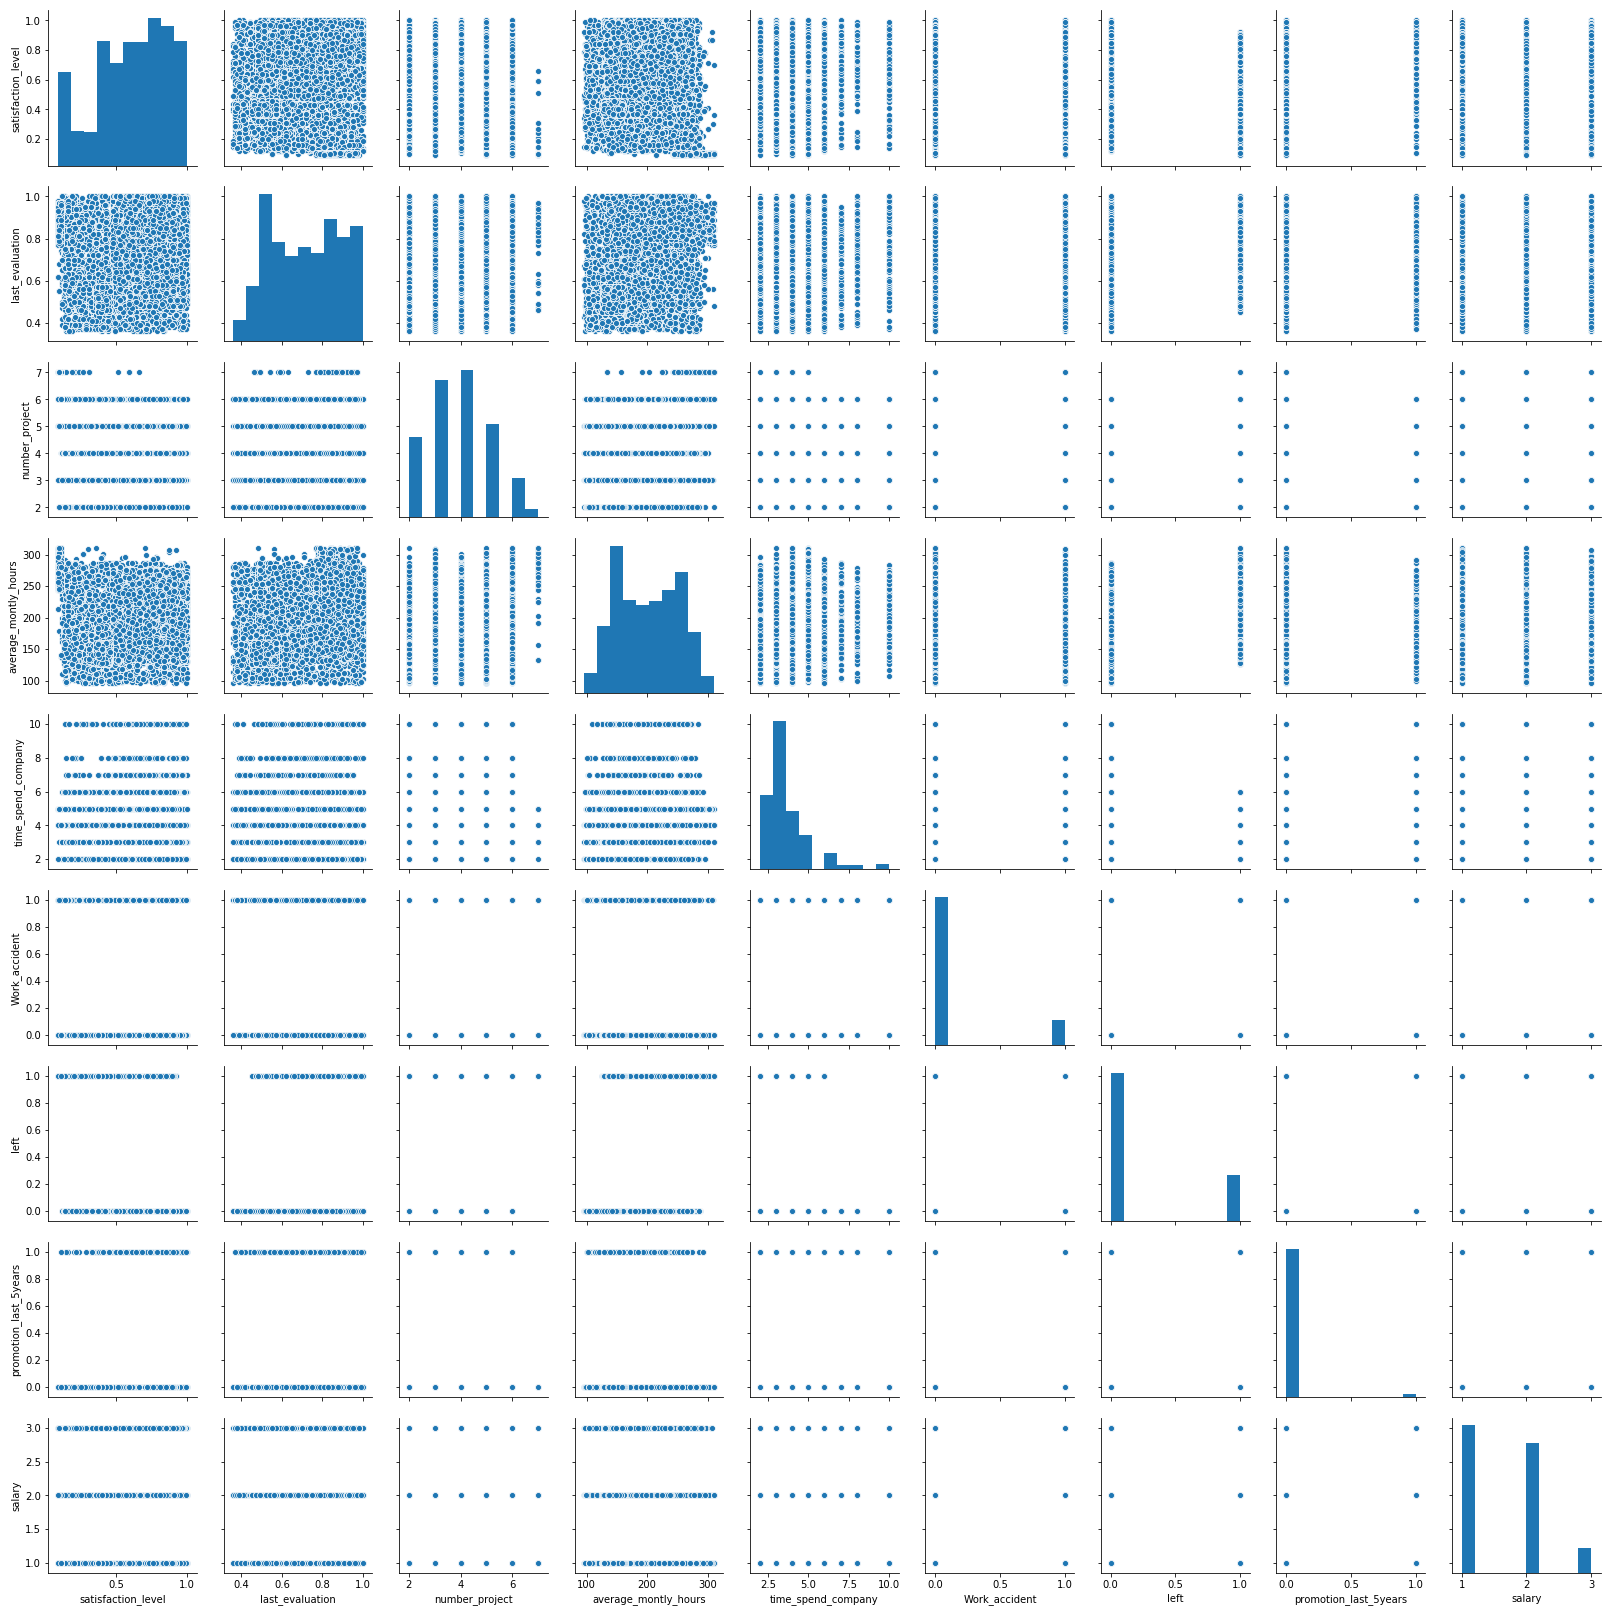

In [100]:
sns.pairplot(data)
plt.show()

Парные графики взаимосвязей всех переменных получилсь не наглядными. Выводы сделать сложно. В качестве примера: number_project и satisfaction_level - при number_project = 7 уровень удовлетворенности снижается.

D:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


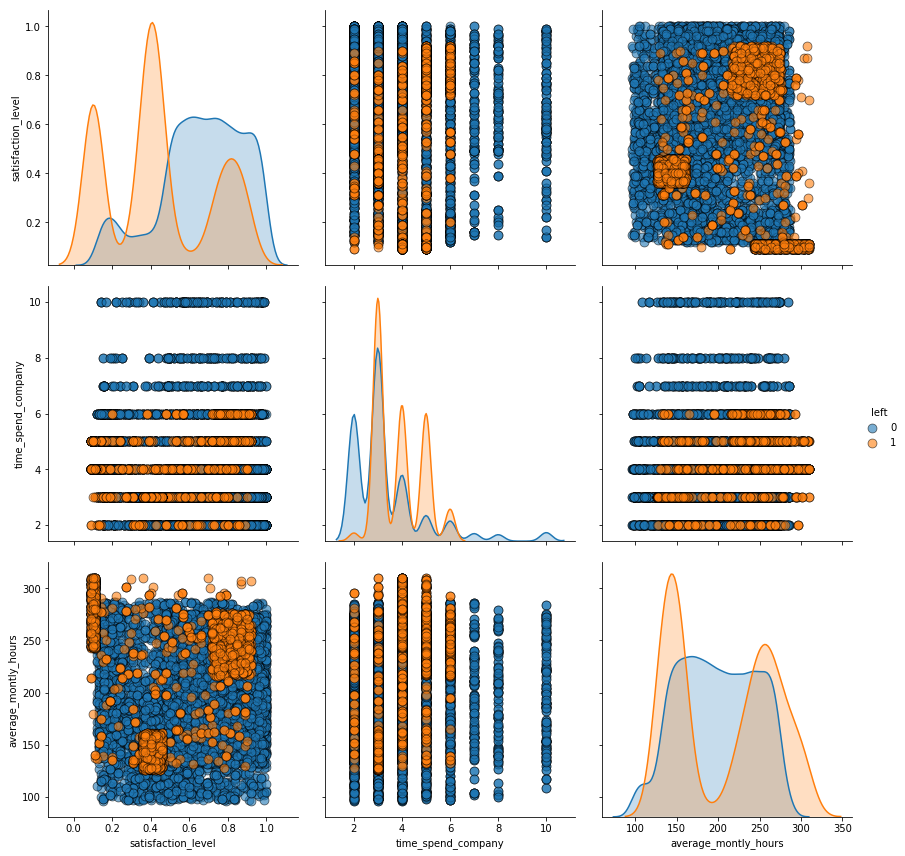

In [103]:
# посмотрим парные графики по выбранным переменным для уволенных и работающих сотрудников
sns.pairplot(data, 
             vars = ['satisfaction_level', 'time_spend_company', 'average_montly_hours'],
             hue = 'left', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Получаются более наглядные результаты, например:
1. среди уволившихся сотрудников не заметно тех, кто проработал свыше 6 лет. 
2. в первый год работы минимум уволившихся, зато на 3 и 4-й года работы приходится большое кол-во увольнений.
3. по среднемесячным часам работы есть "золотая" середина около 200 часов, которые почти не увольняются,а пики по увольнениям либо среди тех, кто работает мало, или наоборот.
4. по диаграмме "уровень удовлетворенности" видно 3 пика по увольнениям - 2 пика логичны, чем ниже уровень удовлетворенности, тем чаще увольняются. Однако интересен 3-й пик, когда уровень удовлетворенности высокий, но сотрудники увольняются.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

С помощью матрицы корреляций получили вывод об отсутствующей или слабой корреляции между переменными. Увидим это с помощью t-test.

In [116]:
alpha_=0.05
param_ = ("satisfaction_level","time_spend_company")
data_1 = data[param_[0]]
data_2 = data[param_[1]]
s_, pvalue = ttest_ind(data_1, data_2)
if pvalue < alpha_:
    # альтернативная гипотеза H1
    print (f'Гипотеза о равных средних {param_} не подтверждается {pvalue}')
else:
    # основная гипотеза H0
    print (f'Гипотеза о равных средних {param_} подтверждается {pvalue}')

Гипотеза о равных средних ('satisfaction_level', 'time_spend_company') не подтверждается 0.0


In [117]:
alpha_=0.05
param_ = ("satisfaction_level","average_montly_hours")
data_1 = data[param_[0]]
data_2 = data[param_[1]]
s_, pvalue = ttest_ind(data_1, data_2)
if pvalue < alpha_:
    # альтернативная гипотеза H1
    print (f'Гипотеза о равных средних {param_} не подтверждается {pvalue}')
else:
    # основная гипотеза H0
    print (f'Гипотеза о равных средних {param_} подтверждается {pvalue}')

Гипотеза о равных средних ('satisfaction_level', 'average_montly_hours') не подтверждается 0.0


In [119]:
alpha_=0.05
param_ = ("satisfaction_level","last_evaluation")
data_1 = data[param_[0]]
data_2 = data[param_[1]]
s_, pvalue = ttest_ind(data_1, data_2)
if pvalue < alpha_:
    # альтернативная гипотеза H1
    print (f'Гипотеза о равных средних {param_} не подтверждается {pvalue}')
else:
    # основная гипотеза H0
    print (f'Гипотеза о равных средних {param_} подтверждается {pvalue}')

Гипотеза о равных средних ('satisfaction_level', 'last_evaluation') не подтверждается 0.0


Несмотря на то, что средние значения выборок "satisfaction_level" и "last_evaluation" составляют 0,6 и 0,7, критерий показывает неподтверждение гипотезы.

6.Рассчитать сколько работников работает в каждом департаменте.

In [49]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [50]:
print(len(data[(data['left'] == 0)]))
data[(data['left'] == 0)]['sales'].value_counts()

11428


sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

Всего 10 департаментов, всего в базе данные по 14 999 сотрудникам, сейчас работает 11 428 сотрудников

7.Показать распределение сотрудников по зарплатам.

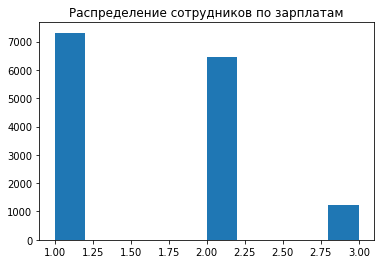

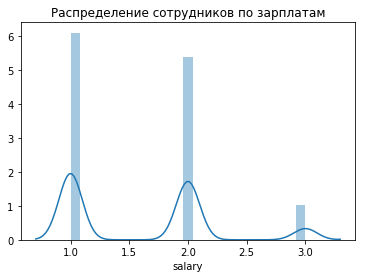

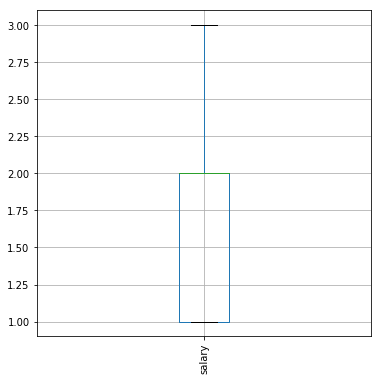

In [59]:
plt.hist(data['salary'])
plt.title('Распределение сотрудников по зарплатам')
plt.show()
sns.distplot(data['salary'])
plt.title('Распределение сотрудников по зарплатам')
plt.show()
data.boxplot(column='salary',figsize=(6,6), rot=90)

In [79]:
data['salary'].describe()

count    14999.000000
mean         1.594706
std          0.637183
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: salary, dtype: float64

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

D:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


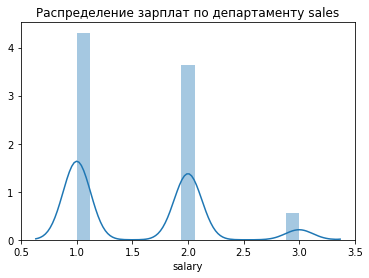

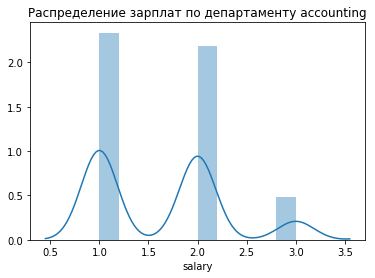

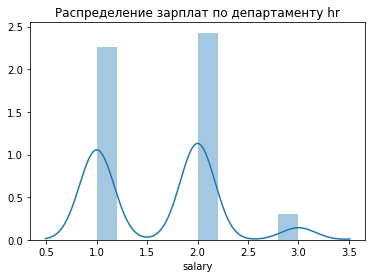

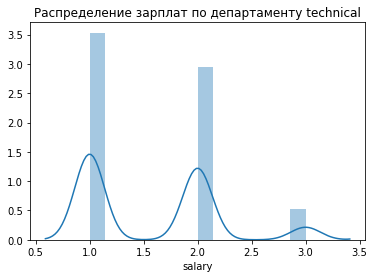

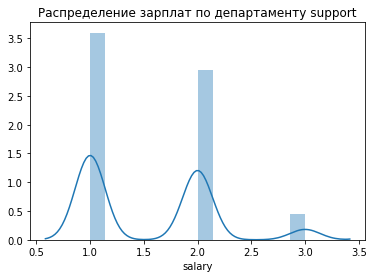

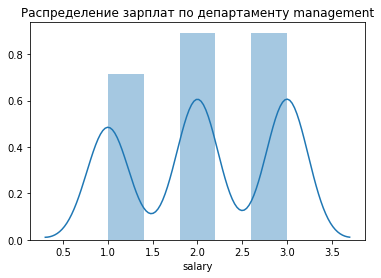

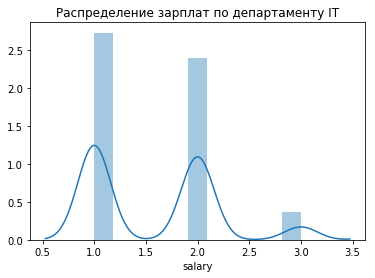

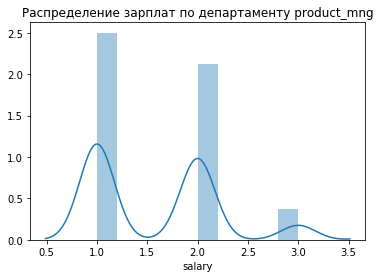

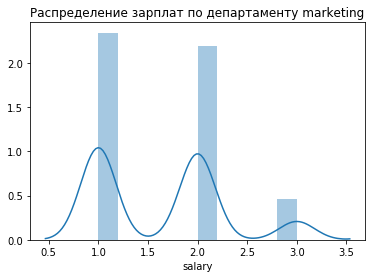

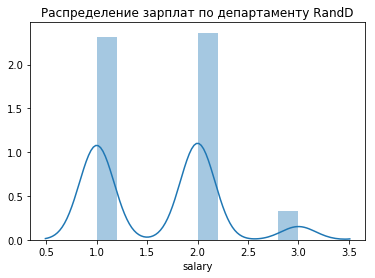

In [121]:
depts = data['sales'].unique()
for dept in depts:
    data_dept = data[(data['sales'] == dept)]['salary']
    sns.distplot(data_dept)
    plt.title('Распределение зарплат по департаменту '+dept)
    plt.show()

9.Сколько сотрудников покинули компанию.

In [13]:
print(len(data[(data['left'] == 1)]))

3571


Компанию покинул 3 571 сотрудник.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Построим модель Random Forest и получим наиболее важные атрибуты для сотрудников, покинувших компанию

In [69]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [74]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# выделяем данные и классы
input_x = data.iloc[:,:10]
del input_x['left']
del input_x['sales']
Y = data['left']

X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)
# обучаем модель
model.fit(X_train_22,y_train_22)

model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3433
           1       0.99      0.96      0.97      1067

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



0.9875555555555555

Модель Random Forest дала точность предсказания порядка **99%**.

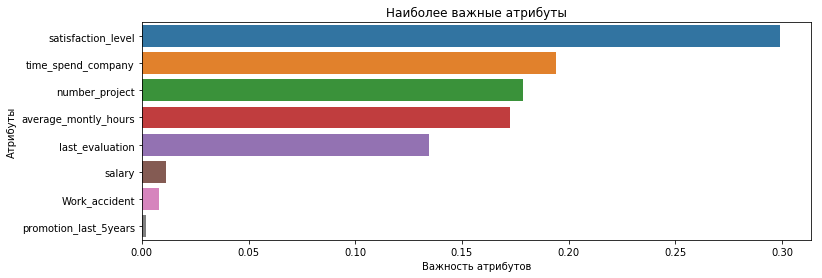

In [76]:
headers = list(X_train_22.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Параметры, наиболее сильно влияющие на увольнение сотрудников:  
1. Уровень удовлетворенности - почти в два раза важнее любого другого параметра
2. Время в компании, количество рабочих проектов, среднее кол-во ежемесячных часов работы и последня оценка - оказывают равное влияние.
3. Уровень зарплаты, наличие инцидентов на работе и наличие повышения - не оказывают влияния на увольнения.

Однако, сам показатель "Уровень удовлетворенности" - это комплексный показатель, и каждый сотрудник может под своей удовлетворенностью от работы понимать разный набор из атрибутов. 
#### Сделаем модель еще раз, но уже без параметра "satisfaction_level":

In [77]:
model=RandomForestClassifier(n_estimators=100)

input_x = data.iloc[:,:10]
del input_x['left']
del input_x['sales']
del input_x['satisfaction_level']
Y = data['left']

X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)
model.fit(X_train_22,y_train_22)
model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3425
           1       0.97      0.96      0.96      1075

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



0.982

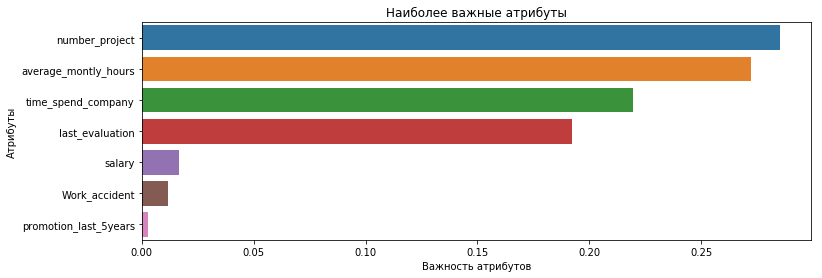

In [78]:
headers = list(X_train_22.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Точность прогноза 98%. Атрибуты ранжированы аналогично предыдущей модели.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

Выполнено